In [1]:
import numpy as np
import pandas as pd

In [2]:
#Data importing from github
url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

In [3]:
#creating dataframe 
df=pd.read_csv(url)
# Deleting the coloums 
df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis =1, inplace=True)

In [4]:
# Missing info
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

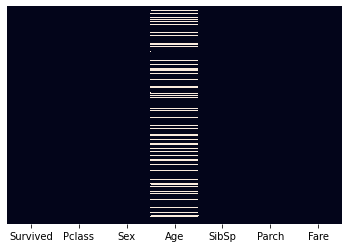

In [5]:
#creating the heatmap to see the heat map
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False,cbar=False)

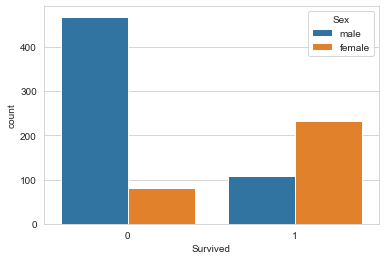

In [6]:
#Plotting graph to see the relation between survived and sex
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data=df)

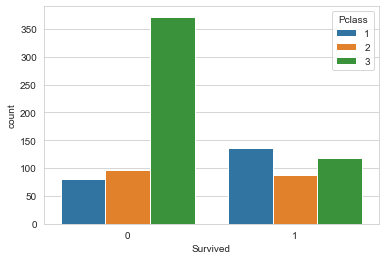

In [7]:
#Plotting graph to see the relation between survived and Pclass
sns.countplot(x='Survived',hue='Pclass', data=df)

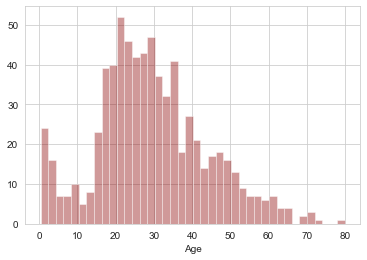

In [8]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred', bins =40,hist=True)

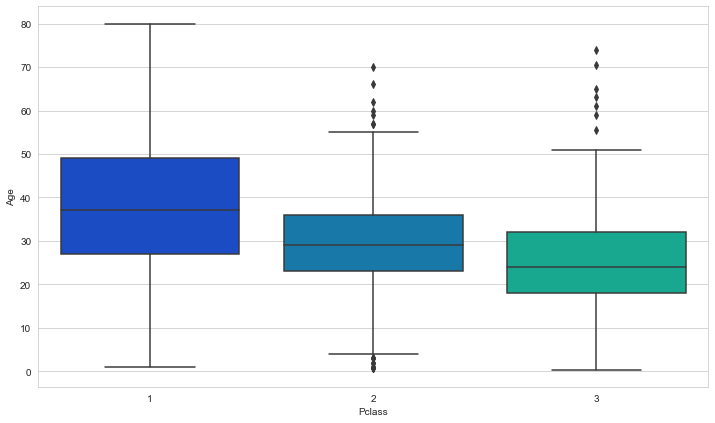

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [12]:
# Updating missing information
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [13]:
#dividing the dependecent and independent variable 
X = df.drop(columns = 'Survived')
y = df['Survived']

In [14]:
#Converting the categorical coloum to 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = (ct.fit_transform(X))

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=45)

In [16]:
from sklearn.tree import DecisionTreeClassifier
titanic=DecisionTreeClassifier()
titanic.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score 
from sklearn.metrics import classification_report
titanic.score(X_train,y_train), titanic.score(X_test, y_test)

(0.9807383627608347, 0.7798507462686567)

In [18]:
path = titanic.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [19]:
clfs = []
for ccp_alpha in ccp_alphas:
    titanic = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    titanic.fit(X_train, y_train)
    clfs.append(titanic)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.13033403995973886


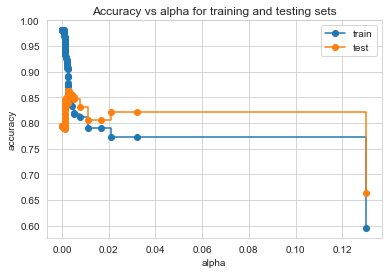

In [20]:
import matplotlib.pyplot as plt
train_scores = [train.score(X_train, y_train) for train in clfs]
test_scores = [train.score(X_test, y_test) for train in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [21]:
titanic= DecisionTreeClassifier(random_state=0, ccp_alpha=0.004)
titanic.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.004, random_state=0)

In [22]:
titanic.score(X_train, y_train), titanic.score(X_test, y_test)

(0.8539325842696629, 0.8582089552238806)

In [23]:
f_name=list(df.columns)
c_name=df['Survived'].unique().astype(str)

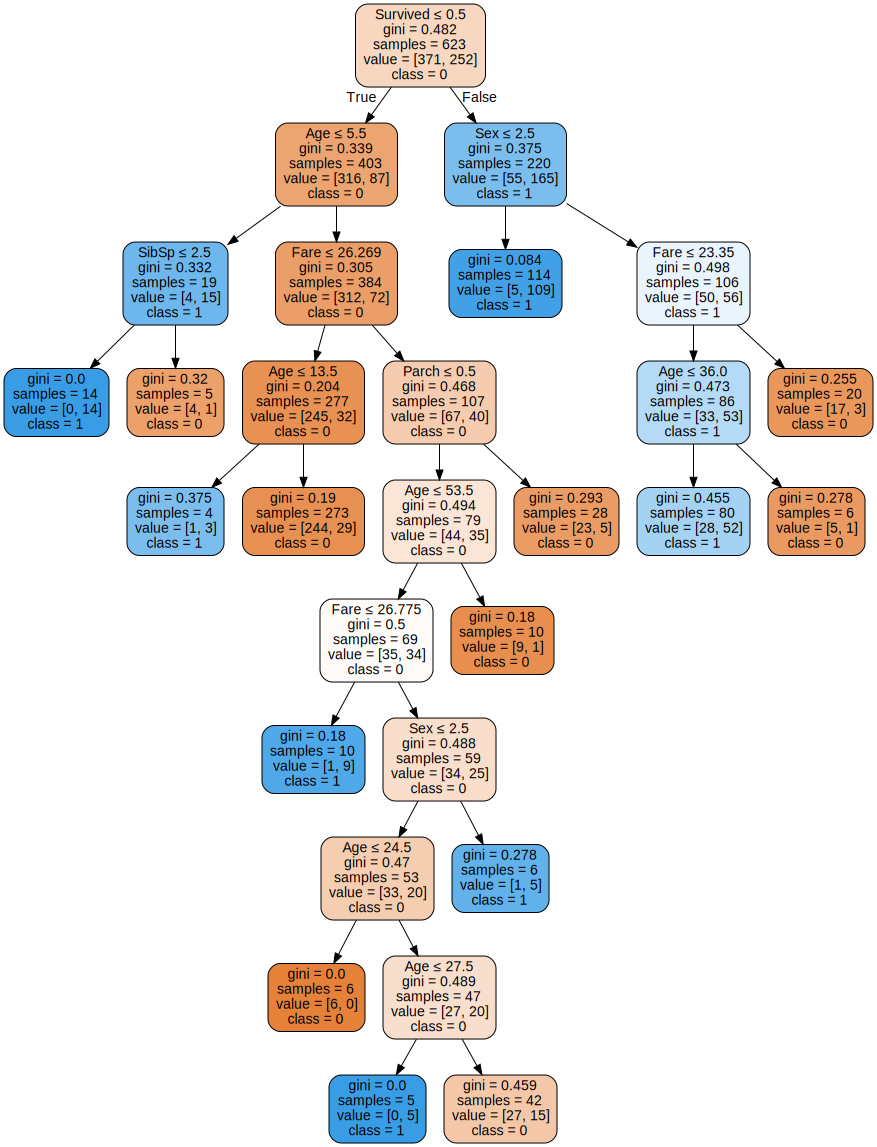

In [24]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(titanic,feature_names=f_name,class_names=c_name,out_file=None, 
                         filled=True,rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.format='png'
graph.render('titanic', view=True)
graph